## Homework Exercise: Shruti Bajpai

1. Exercise 3 (p.332, Chap.8)
2. Exercise 5 (p.332, Chap.8)
3. Exercise 8 (p.333, Chap.8)
4. Exercise 9 (p.334, Chap.8)
5. Exercise 10 (p.334, Chap.8)

### Q1) Chapter 8 Exercise 3

#### Consider the Gini index, classification error, and entropy in a simple classification setting with two classes. Create a single plot that displays each of these quantities as a function of ˆpm1. The xaxis should display ˆpm1, ranging from 0 to 1, and the y-axis should display the value of the Gini index, classification error, and entropy. Hint: In a setting with two classes, pˆm1 = 1 − pˆm2. You could make this plot by hand, but it will be much easier to make in R

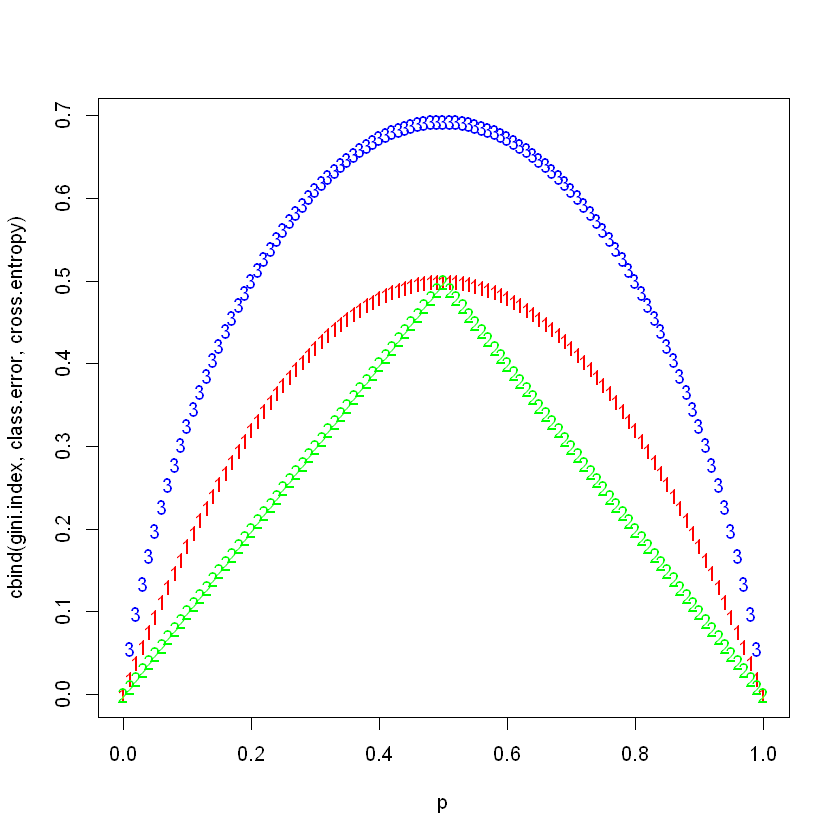

In [1]:
p <- seq(0, 1, 0.01)
gini.index <- 2 * p * (1 - p)
class.error <- 1 - pmax(p, 1 - p)
cross.entropy <- - (p * log(p) + (1 - p) * log(1 - p))
matplot(p, cbind(gini.index, class.error, cross.entropy), col = c("red", "green", "blue"))

### Q2) Chapter 8 Exercise 5


#### Suppose we produce ten bootstrapped samples from a data set containing red and green classes. We then apply a classification tree to each bootstrapped sample and, for a specific value of X, produce 10 estimates of P(Class is Red|X): 0.1, 0.15, 0.2, 0.2, 0.55, 0.6, 0.6, 0.65, 0.7, and 0.75. There are two common ways to combine these results together into a single class prediction. One is the majority vote approach discussed in this chapter. The second approach is to classify based on the average probability. In this example, what is the final classification under each of these two approaches?

The majority vote approach classifies Red as the most commonly occurred class between the 10 predictions, while the average probability approach classifies X as Green with an average of the 10 probabilities as 0.45.

### Q2) Chapter 8 Exercise 8


#### In the lab, a classification tree was applied to the Carseats data set after converting Sales into a qualitative response variable. Now we will seek to predict Sales using regression trees and related approaches, treating the response as a quantitative variable.

##### (a) Split the data set into a training set and a test set.

In [5]:
library(ISLR)
set.seed(1)
train = sample (1:nrow(Carseats), nrow(Carseats)/2)
Carseats.train <- Carseats[train, ]
Carseats.test <- Carseats[-train, ]

##### b) Fit a regression tree to the training set. Plot the tree, and interpret the results. What test MSE do you obtain?

The MSE is approximately 4.92

Warning message:
"package 'tree' is in use and will not be installed"


Regression tree:
tree(formula = Sales ~ ., data = Carseats, subset = train)
Variables actually used in tree construction:
[1] "ShelveLoc"   "Price"       "Age"         "Advertising" "CompPrice"  
[6] "US"         
Number of terminal nodes:  18 
Residual mean deviance:  2.167 = 394.3 / 182 
Distribution of residuals:
    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-3.88200 -0.88200 -0.08712  0.00000  0.89590  4.09900 

[1] 4.922039

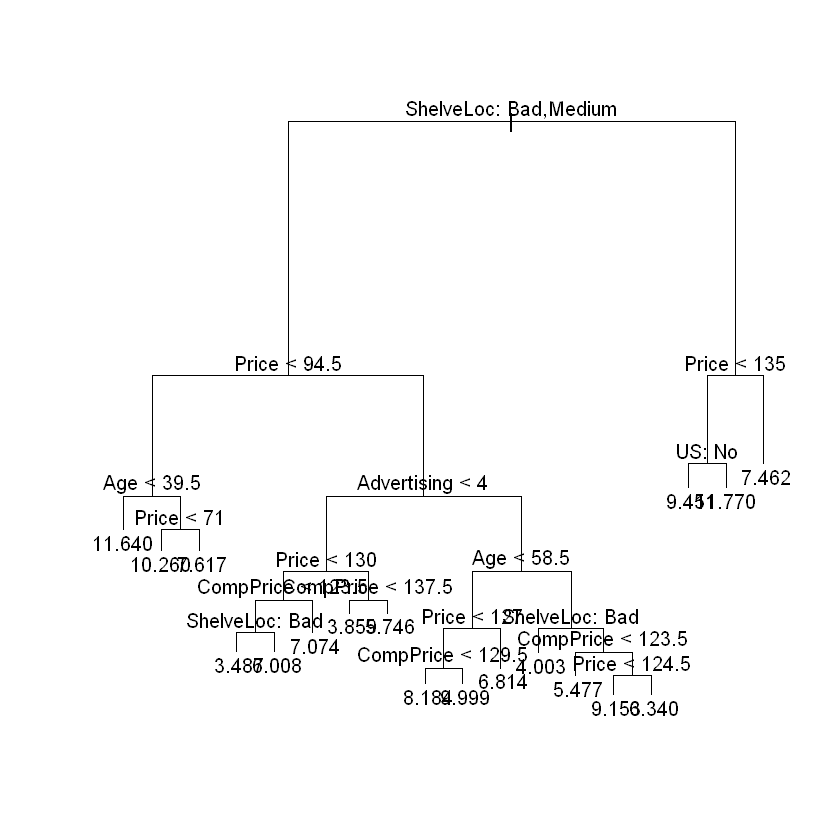

In [21]:
install.packages("tree")
library("tree")

tree.carseats=tree(Sales~.,Carseats , subset=train)
summary(tree.carseats)

plot(tree.carseats)
text(tree.carseats , pretty =0)

predic.carseats=predict(tree.carseats ,Carseats.test)
mean((Carseats.test$Sales - predic.carseats)^2)

##### c) Use cross-validation in order to determine the optimal level of tree complexity. Does pruning the tree improve the test MSE?

According to the book, it should have increased it, but for my situation it did not. The MSE is 4.91, slightly lower than previously. If you prune too high then you do get a larger pruned tree, but the accuracy is less and while the MSE is better at 12, I was unable to calculate if the accuracy score too was higher, therefore judging by the book, I went lower.

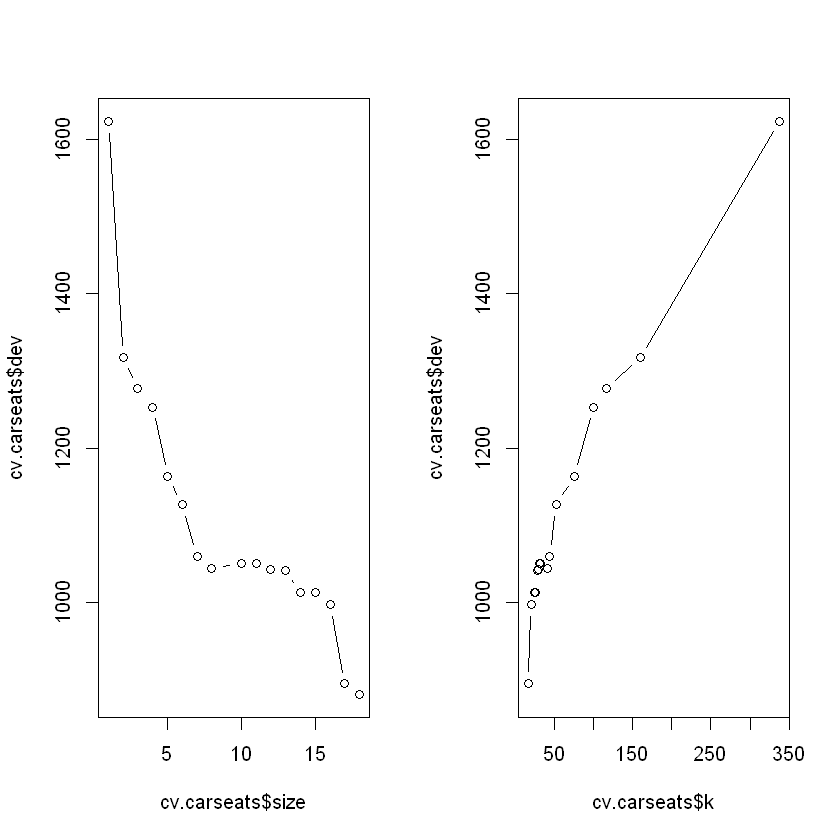

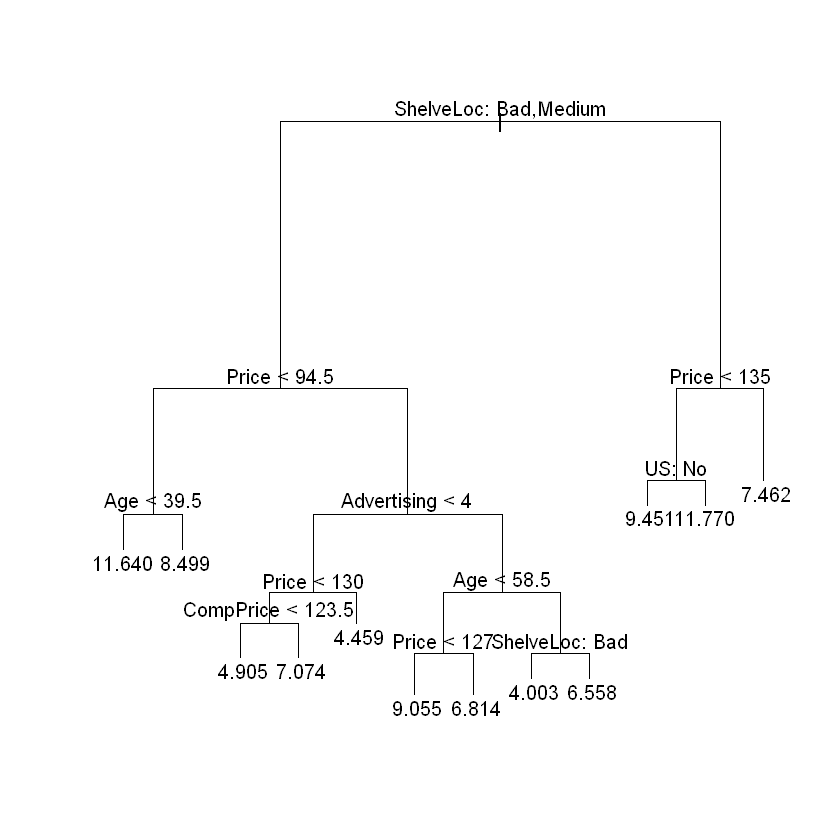

In [52]:
cv.carseats = cv.tree(tree.carseats ,FUN = prune.tree)
par(mfrow=c(1,2))
plot(cv.carseats$size ,cv.carseats$dev ,type="b")
plot(cv.carseats$k ,cv.carseats$dev ,type="b")

pruned.carseats = prune.tree(tree.carseats, best = 12)
par(mfrow = c(1, 1))
plot(pruned.carseats)
text(pruned.carseats, pretty = 0)

[1] 4.918134

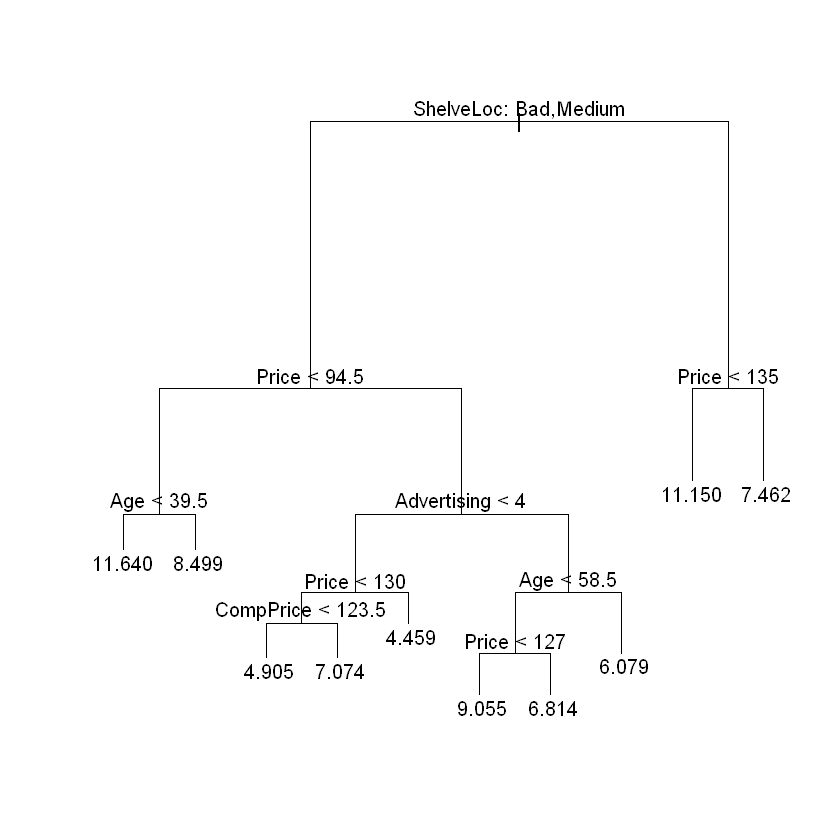

In [53]:
#Best Prune at 9

pruned.carseats = prune.tree(tree.carseats, best = 9)
par(mfrow = c(1, 1))
plot(pruned.carseats)
text(pruned.carseats, pretty = 0)

pred.pruned = predict(pruned.carseats, Carseats.test)
mean((Carseats.test$Sales - pred.pruned)^2)

##### d) Use the bagging approach in order to analyze this data. What test MSE do you obtain? Use the importance() function to determine which variables are most important.

The MSE is 2.66; we can notate that price, shelveloc, compprice and age are the four most important variables.

In [59]:
install.packages("randomForest")
library("randomForest")
bag.carseats= randomForest( Sales~.,data=Carseats , subset=train , mtry=10, ntree = 500, importance =TRUE)
bag.pred = predict(bag.carseats, Carseats.test)
mean((Carseats.test$Sales - bag.pred)^2)
importance(bag.carseats)

Warning message:
"package 'randomForest' is in use and will not be installed"

[1] 2.660474

,%IncMSE,IncNodePurity
CompPrice,24.983963,170.40573
Income,4.363170,91.08246
Advertising,12.513741,98.68340
Population,-1.512279,60.13562
Price,55.879290,504.92512
ShelveLoc,50.571101,383.98559
Age,14.321481,157.55764
Education,2.047367,43.94673
Urban,-1.018287,10.09682
US,3.196133,15.60079


##### e) Use random forests to analyze this data. What test MSE do you obtain? Use the importance() function to determine which variables are most important. Describe the effect of m, the number of variables considered at each split, on the error rate obtained.

The MSE is 2.66, same as previously and the change in m does not seem to really affect the MSE no matter how high or low I go. Additionally, the variables listed previously (Price, ShelveLoc, CompPrice, Age) are no different in terms of significance with a higher m than with ah lower M.

In [70]:
rf.carseats= randomForest( Sales~.,data=Carseats , subset=train , mtry=2, ntree = 500, importance =TRUE)
rf.pred = predict(bag.carseats, Carseats.test)
mean((Carseats.test$Sales - rf.pred)^2)
importance(rf.carseats)

[1] 2.660474

,%IncMSE,IncNodePurity
CompPrice,11.80958547,146.72700
Income,0.34520802,132.40979
Advertising,7.38341540,113.17816
Population,-2.50247591,113.41107
Price,29.76610022,348.06869
ShelveLoc,30.05720707,253.26366
Age,11.79994566,172.32456
Education,2.07346499,86.94116
Urban,-0.05422346,20.74362
US,5.88195832,39.51516


### Q4) Chapter 8 Exercise 9

#### This problem involves the OJ data set which is part of the ISLR package.

In [81]:
install.packages('ISLR')
attach(OJ)

OJ

Warning message:
"package 'ISLR' is in use and will not be installed"The following objects are masked from OJ (pos = 3):

    DiscCH, DiscMM, ListPriceDiff, LoyalCH, PctDiscCH, PctDiscMM,
    PriceCH, PriceDiff, PriceMM, Purchase, SalePriceCH, SalePriceMM,
    SpecialCH, SpecialMM, STORE, Store7, StoreID, WeekofPurchase

The following objects are masked from OJ (pos = 4):

    DiscCH, DiscMM, ListPriceDiff, LoyalCH, PctDiscCH, PctDiscMM,
    PriceCH, PriceDiff, PriceMM, Purchase, SalePriceCH, SalePriceMM,
    SpecialCH, SpecialMM, STORE, Store7, StoreID, WeekofPurchase

The following objects are masked from OJ (pos = 5):

    DiscCH, DiscMM, ListPriceDiff, LoyalCH, PctDiscCH, PctDiscMM,
    PriceCH, PriceDiff, PriceMM, Purchase, SalePriceCH, SalePriceMM,
    SpecialCH, SpecialMM, STORE, Store7, StoreID, WeekofPurchase



Purchase,WeekofPurchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,Store7,PctDiscMM,PctDiscCH,ListPriceDiff,STORE
CH,237,1,1.75,1.99,0.00,0.00,0,0,0.500000,1.99,1.75,0.24,No,0.000000,0.000000,0.24,1
CH,239,1,1.75,1.99,0.00,0.30,0,1,0.600000,1.69,1.75,-0.06,No,0.150754,0.000000,0.24,1
CH,245,1,1.86,2.09,0.17,0.00,0,0,0.680000,2.09,1.69,0.40,No,0.000000,0.091398,0.23,1
MM,227,1,1.69,1.69,0.00,0.00,0,0,0.400000,1.69,1.69,0.00,No,0.000000,0.000000,0.00,1
CH,228,7,1.69,1.69,0.00,0.00,0,0,0.956535,1.69,1.69,0.00,Yes,0.000000,0.000000,0.00,0
CH,230,7,1.69,1.99,0.00,0.00,0,1,0.965228,1.99,1.69,0.30,Yes,0.000000,0.000000,0.30,0
CH,232,7,1.69,1.99,0.00,0.40,1,1,0.972182,1.59,1.69,-0.10,Yes,0.201005,0.000000,0.30,0
CH,234,7,1.75,1.99,0.00,0.40,1,0,0.977746,1.59,1.75,-0.16,Yes,0.201005,0.000000,0.24,0
CH,235,7,1.75,1.99,0.00,0.40,0,0,0.982197,1.59,1.75,-0.16,Yes,0.201005,0.000000,0.24,0
CH,238,7,1.75,1.99,0.00,0.40,0,0,0.985757,1.59,1.75,-0.16,Yes,0.201005,0.000000,0.24,0


##### a) Create a training set containing a random sample of 800 observations, and a test set containing the remaining observations. 

In [75]:
set.seed(1000)
train = sample(dim(OJ)[1], 800)
OJ.train = OJ[train, ]
OJ.test = OJ[-train, ]

##### b) Fit a tree to the training data, with Purchase as the response and the other variables as predictors. Use the summary() function to produce summary statistics about the tree, and describe the results obtained. What is the training error rate? How many terminal nodes does the tree have? 

Tree has 8 nodes with the variables LoyalCH, PriceDiff and SalesPriceMM used. The training error rate was 0.16

In [85]:
OJ.tree=tree(Purchase~.,data=OJ.train)
summary(OJ.tree)


Classification tree:
tree(formula = Purchase ~ ., data = OJ.train)
Variables actually used in tree construction:
[1] "LoyalCH"     "PriceDiff"   "SalePriceMM"
Number of terminal nodes:  8 
Residual mean deviance:  0.7486 = 592.9 / 792 
Misclassification error rate: 0.16 = 128 / 800 

##### c) Type in the name of the tree object in order to get a detailed text output. Pick one of the terminal nodes, and interpret the information displayed.

Terminal Node 10 splits at the value of 0.05 with 78 points in the subtree below this node with a deviance of 79.16 below this node. An asteric (*) in fact denotes this as a node showcasing that PriceDiff has about 20% denoted to CH and the rest are for MM.

In [87]:
OJ.tree

node), split, n, deviance, yval, (yprob)
      * denotes terminal node

 1) root 800 1066.00 CH ( 0.61500 0.38500 )  
   2) LoyalCH < 0.5036 353  422.60 MM ( 0.28612 0.71388 )  
     4) LoyalCH < 0.276142 170  131.00 MM ( 0.12941 0.87059 )  
       8) LoyalCH < 0.035047 57   10.07 MM ( 0.01754 0.98246 ) *
       9) LoyalCH > 0.035047 113  108.50 MM ( 0.18584 0.81416 ) *
     5) LoyalCH > 0.276142 183  250.30 MM ( 0.43169 0.56831 )  
      10) PriceDiff < 0.05 78   79.16 MM ( 0.20513 0.79487 ) *
      11) PriceDiff > 0.05 105  141.30 CH ( 0.60000 0.40000 ) *
   3) LoyalCH > 0.5036 447  337.30 CH ( 0.87472 0.12528 )  
     6) LoyalCH < 0.764572 187  206.40 CH ( 0.75936 0.24064 )  
      12) SalePriceMM < 2.125 120  156.60 CH ( 0.64167 0.35833 )  
        24) PriceDiff < -0.35 16   17.99 MM ( 0.25000 0.75000 ) *
        25) PriceDiff > -0.35 104  126.70 CH ( 0.70192 0.29808 ) *
      13) SalePriceMM > 2.125 67   17.99 CH ( 0.97015 0.02985 ) *
     7) LoyalCH > 0.764572 260   91.11 CH ( 0.

###### d) Create a plot of the tree, and interpret the results.

LoyalCH is the most important node in the tree with the top three nodes actually being LoyalCH. If LoyalCH < 27% then the tree predicts MM, else the tree predicts CH because LoyalCH > 76%. The intermediate nodes depend the decision for PriceDiff

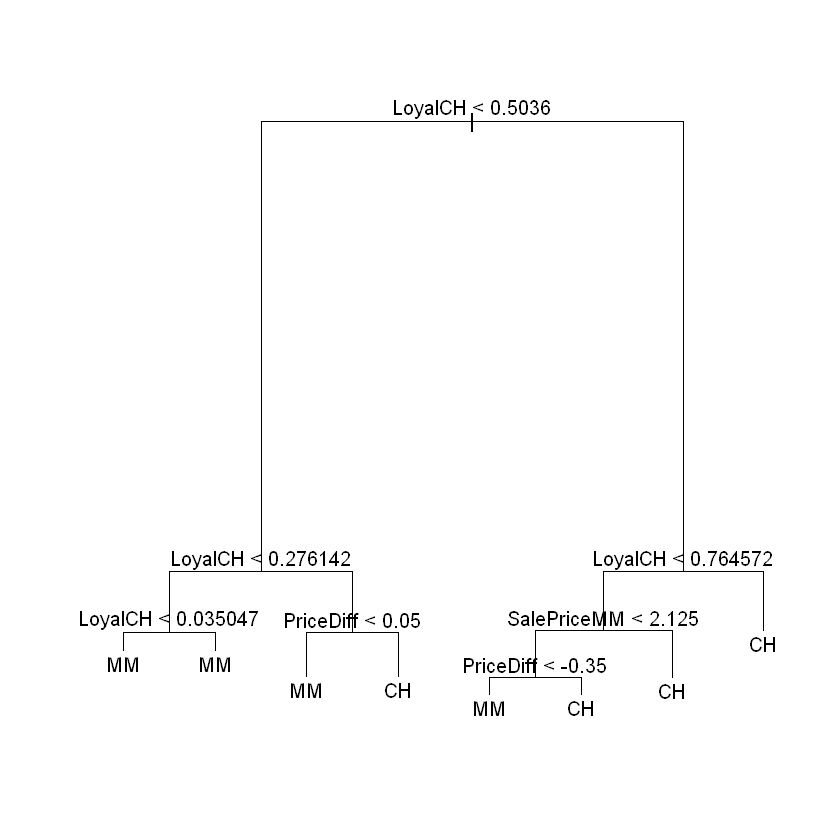

In [88]:
plot(OJ.tree)
text(OJ.tree , pretty =0)

##### e) Predict the response on the test data, and produce a confusion matrix comparing the test labels to the predicted test labels. What is the test error rate?

The test predicts with approximately 82% accuracy, meaning 18% it is inaccurate (test error rate)

In [92]:
OJ.pred = predict(OJ.tree, OJ.test, type = "class")
table(OJ.test$Purchase, OJ.pred)

(150 + 71)/270

    OJ.pred
      CH  MM
  CH 150  11
  MM  38  71

[1] 0.8185185

##### f) Apply the cv.tree() function to the training set in order to determine the optimal tree size.

In [95]:
cv.OJ = cv.tree(OJ.tree, FUN=prune.tree)

##### g) Produce a plot with tree size on the x-axis and cross-validated classification error rate on the y-axis.

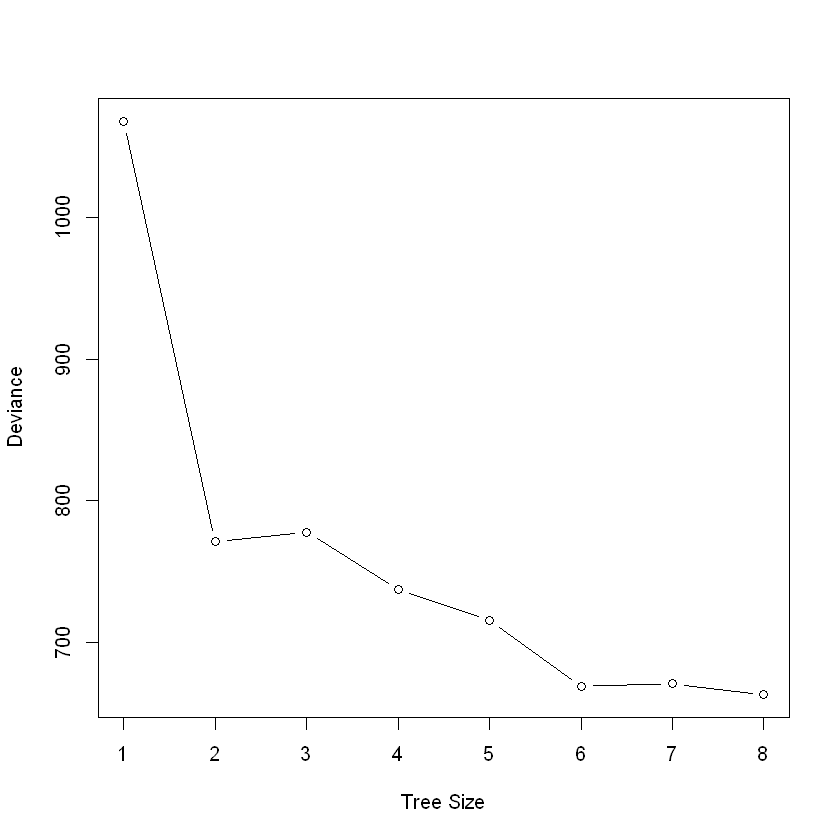

In [96]:
plot(cv.OJ$size, cv.OJ$dev, type = "b", xlab = "Tree Size", ylab = "Deviance")

##### h) which tree size corresponds to the lowest cross-validated classification error rate?

Size of 8 gives lowest cross-validation error.

##### i) Produce a pruned tree corresponding to the optimal tree size obtained using cross-validation. If cross-validation does not lead to selection of a pruned tree, then create a pruned tree with five terminal nodes.

In [103]:
OJ.pruned = prune.tree(OJ.tree, best = 8)
OJ.pruned

node), split, n, deviance, yval, (yprob)
      * denotes terminal node

 1) root 800 1066.00 CH ( 0.61500 0.38500 )  
   2) LoyalCH < 0.5036 353  422.60 MM ( 0.28612 0.71388 )  
     4) LoyalCH < 0.276142 170  131.00 MM ( 0.12941 0.87059 )  
       8) LoyalCH < 0.035047 57   10.07 MM ( 0.01754 0.98246 ) *
       9) LoyalCH > 0.035047 113  108.50 MM ( 0.18584 0.81416 ) *
     5) LoyalCH > 0.276142 183  250.30 MM ( 0.43169 0.56831 )  
      10) PriceDiff < 0.05 78   79.16 MM ( 0.20513 0.79487 ) *
      11) PriceDiff > 0.05 105  141.30 CH ( 0.60000 0.40000 ) *
   3) LoyalCH > 0.5036 447  337.30 CH ( 0.87472 0.12528 )  
     6) LoyalCH < 0.764572 187  206.40 CH ( 0.75936 0.24064 )  
      12) SalePriceMM < 2.125 120  156.60 CH ( 0.64167 0.35833 )  
        24) PriceDiff < -0.35 16   17.99 MM ( 0.25000 0.75000 ) *
        25) PriceDiff > -0.35 104  126.70 CH ( 0.70192 0.29808 ) *
      13) SalePriceMM > 2.125 67   17.99 CH ( 0.97015 0.02985 ) *
     7) LoyalCH > 0.764572 260   91.11 CH ( 0.

##### j) Compare the training error rates between the pruned and unpruned trees. Which is higher?

The misclassification error of the pruned tree didn't change from the original tree; it is still 0.16 

In [102]:
summary(OJ.pruned)


Classification tree:
tree(formula = Purchase ~ ., data = OJ.train)
Variables actually used in tree construction:
[1] "LoyalCH"     "PriceDiff"   "SalePriceMM"
Number of terminal nodes:  8 
Residual mean deviance:  0.7486 = 592.9 / 792 
Misclassification error rate: 0.16 = 128 / 800 

##### k)  Compare the test error rates between the pruned and unpruned trees. Which is higher?

Test error rate is the same - 0.18

In [105]:
pred.unpruned = predict(OJ.tree, OJ.test, type = "class")
misclass.unpruned = sum(OJ.test$Purchase != pred.unpruned)
misclass.unpruned/length(pred.unpruned)

[1] 0.1814815

In [104]:
pred.pruned = predict(OJ.pruned, OJ.test, type = "class")
misclass.pruned = sum(OJ.test$Purchase != pred.pruned)
misclass.pruned/length(pred.pruned)

[1] 0.1814815

### Q5) Chapter 8 Exercise 10

#### We now use boosting to predict Salary in the Hitters data set.

In [109]:
Hitters

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
-Alan Ashby,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,6.163315,N
-Alvin Davis,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,6.173786,A
-Andre Dawson,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,6.214608,N
-Andres Galarraga,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,4.516339,N
-Alfredo Griffin,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,6.620073,A
-Al Newman,185,37,1,23,8,21,2,214,42,1,30,9,24,N,E,76,127,7,4.248495,A
-Argenis Salazar,298,73,0,24,24,7,3,509,108,0,41,37,12,A,W,121,283,9,4.605170,A
-Andres Thomas,323,81,6,26,32,8,2,341,86,6,32,34,8,N,W,143,290,19,4.317488,N
-Andre Thornton,401,92,17,49,66,65,13,5206,1332,253,784,890,866,A,E,0,0,0,7.003065,A
-Alan Trammell,574,159,21,107,75,59,10,4631,1300,90,702,504,488,A,E,238,445,22,6.248319,A


##### a) Remove the observations for whom the salary information is unknown, and then log-transform the salaries.

In [107]:
sum(is.na(Hitters$Salary))
Hitters = Hitters[-which(is.na(Hitters$Salary)), ]
sum(is.na(Hitters$Salary))
Hitters$Salary = log(Hitters$Salary)

[1] 59

[1] 0

##### b) Create a training set consisting of the first 200 observations, and a test set consisting of the remaining observations.

In [110]:
train = 1:200
Hitters.train = Hitters[train, ]
Hitters.test = Hitters[-train, ]

##### c) Perform boosting on the training set with 1,000 trees for a range of values of the shrinkage parameter λ. Produce a plot with different shrinkage values on the x-axis and the corresponding training set MSE on the y-axis.

In [114]:
install.packages("gbm")
library("gbm")

package 'gbm' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\bajpa\AppData\Local\Temp\RtmpQjc4r8\downloaded_packages


Warning message:
"package 'gbm' was built under R version 3.6.3"Loaded gbm 2.1.8


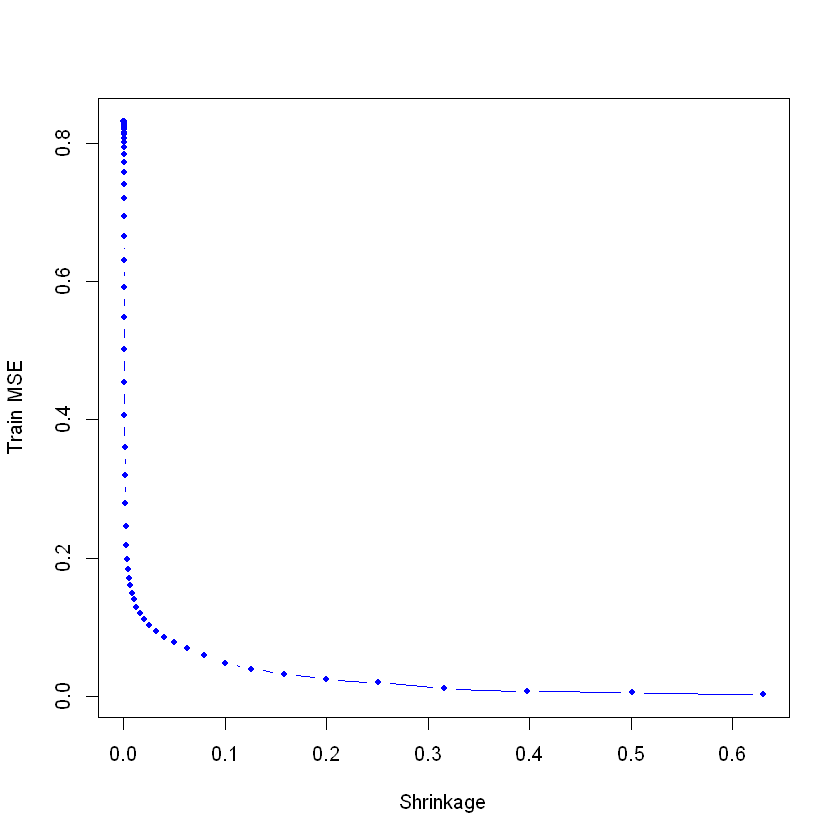

In [115]:
set.seed(103)
pows = seq(-10, -0.2, by = 0.1)
lambdas = 10^pows
length.lambdas = length(lambdas)
train.errors = rep(NA, length.lambdas)
test.errors = rep(NA, length.lambdas)
for (i in 1:length.lambdas) {
    boost.hitters = gbm(Salary ~ ., data = Hitters.train, distribution = "gaussian", 
        n.trees = 1000, shrinkage = lambdas[i])
    train.pred = predict(boost.hitters, Hitters.train, n.trees = 1000)
    test.pred = predict(boost.hitters, Hitters.test, n.trees = 1000)
    train.errors[i] = mean((Hitters.train$Salary - train.pred)^2)
    test.errors[i] = mean((Hitters.test$Salary - test.pred)^2)
}

plot(lambdas, train.errors, type = "b", xlab = "Shrinkage", ylab = "Train MSE", 
    col = "blue", pch = 20)

##### d) Produce a plot with different shrinkage values on the x-axis and the corresponding test set MSE on the y-axis.

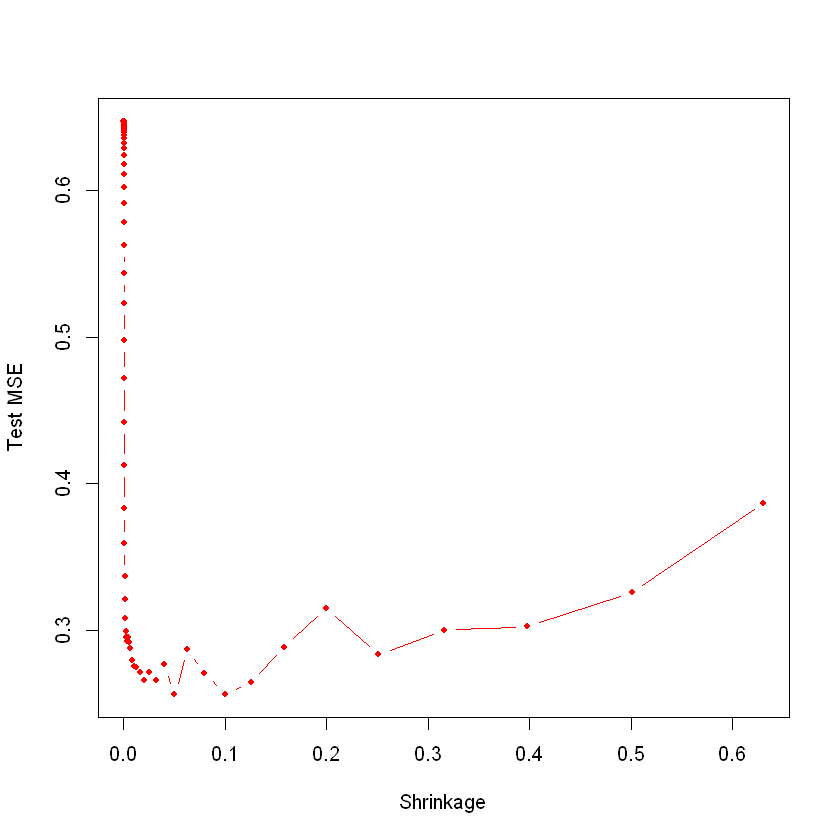

In [116]:
plot(lambdas, test.errors, type = "b", xlab = "Shrinkage", ylab = "Test MSE", 
    col = "red", pch = 20)

In [117]:
min(test.errors)
lambdas[which.min(test.errors)]

[1] 0.2560507

[1] 0.05011872

##### e) Compare the test MSE of boosting to the test MSE that results from applying two of the regression approaches seen in Chapters 3 and 6.

Both linear model and regularization like Lasso have higher test MSE than boosting.

In [118]:
lm.fit = lm(Salary ~ ., data = Hitters.train)
lm.pred = predict(lm.fit, Hitters.test)
mean((Hitters.test$Salary - lm.pred)^2)

[1] 0.4917959

In [119]:
library(glmnet)

Warning message:
"package 'glmnet' was built under R version 3.6.3"Loading required package: Matrix
Warning message:
"package 'Matrix' was built under R version 3.6.3"Loaded glmnet 4.1-1


In [120]:
set.seed(134)
x = model.matrix(Salary ~ ., data = Hitters.train)
y = Hitters.train$Salary
x.test = model.matrix(Salary ~ ., data = Hitters.test)
lasso.fit = glmnet(x, y, alpha = 1)
lasso.pred = predict(lasso.fit, s = 0.01, newx = x.test)
mean((Hitters.test$Salary - lasso.pred)^2)

[1] 0.4700537

##### f) which variables appear to be the most important predictors in the boosted model?

CAtBat, CWalks, and CHits are the most important predictors in that order.

,var,rel.inf
CAtBat,CAtBat,22.7562681
CWalks,CWalks,10.4279674
CHits,CHits,8.6198109
PutOuts,PutOuts,6.6159325
Years,Years,6.4611683
Walks,Walks,6.2331148
CRBI,CRBI,6.0926744
CHmRun,CHmRun,5.1076104
RBI,RBI,4.5321678
CRuns,CRuns,4.4728132


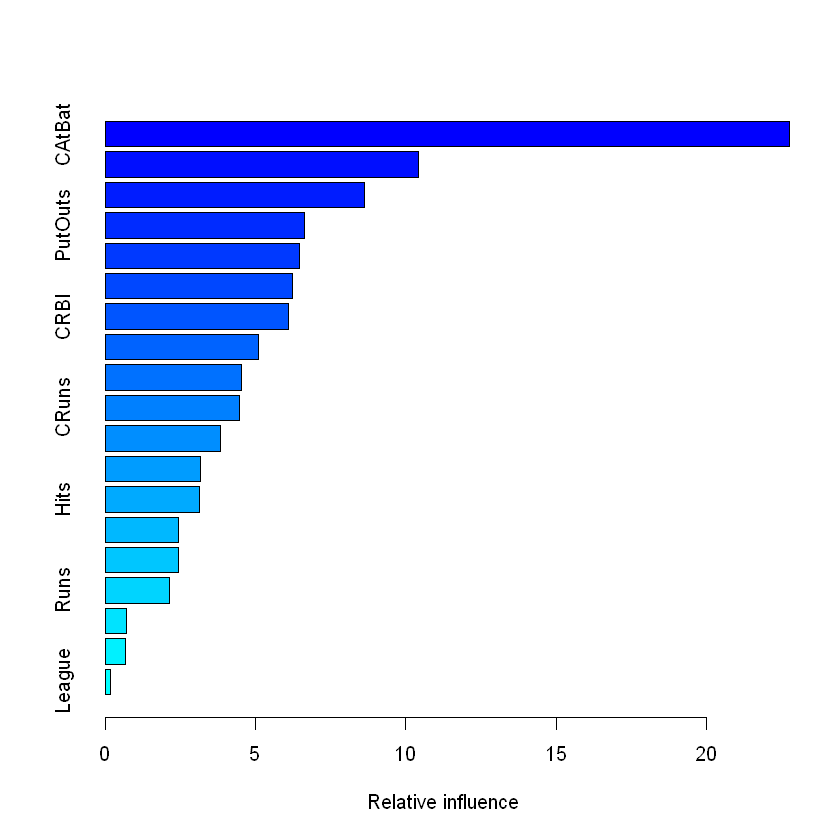

In [121]:
boost.best = gbm(Salary ~ ., data = Hitters.train, distribution = "gaussian", 
    n.trees = 1000, shrinkage = lambdas[which.min(test.errors)])
summary(boost.best)

##### g) Now apply bagging to the training set. What is the test set MSE for this approach?

MSE for test set is 0.23

In [122]:
set.seed(21)
rf.hitters = randomForest(Salary ~ ., data = Hitters.train, ntree = 500, mtry = 19)
rf.pred = predict(rf.hitters, Hitters.test)
mean((Hitters.test$Salary - rf.pred)^2)

[1] 0.2303919